# Read in Data

In [3]:
import tensorflow as tf
import torch.nn as nn
import scipy
import numpy as np

In [4]:
!wget https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM12.csv

--2023-04-21 07:13:37--  https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM12.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2346 (2.3K) [text/plain]
Saving to: ‘QCM12.csv’

QCM12.csv           100%[===================>]   2.29K  --.-KB/s    in 0s      

2023-04-21 07:13:38 (31.5 MB/s) - ‘QCM12.csv’ saved [2346/2346]



In [5]:
import pandas as pd 
QCM12 = pd.read_csv("QCM12.csv", sep=";", dtype=np.float32)

In [ ]:
QCM12.head()

0.799_0.201  0.799_0.201.1  0.700_0.300  0.700_0.300.1  0.600_0.400  \
0    -9.400000      -7.950000   -21.440001     -17.459999   -34.389999   
1   -13.180000     -12.010000   -26.459999     -22.750000   -41.480000   
2   -18.610001     -16.290001   -32.840000     -28.719999   -49.320000   
3   -21.879999     -19.809999   -38.180000     -33.770000   -56.270000   
4   -24.840000     -22.360001   -42.610001     -37.939999   -60.470001   

   0.600_0.400.1  0.501_0.499  0.501_0.499.1  0.400_0.600  0.400_0.600.1  \
0     -27.350000   -48.610001     -39.910000   -63.619999     -53.139999   
1     -34.599998   -56.740002     -48.680000   -73.449997     -63.169998   
2     -42.290001   -65.870003     -57.889999   -84.449997     -73.989998   
3     -48.930000   -74.089996     -65.989998   -92.610001     -83.370003   
4     -53.860001   -80.669998     -72.620003  -101.139999     -91.330002   

   1-Octanol  1-Propanol  2-Butanol  2-propanol  1-isobutanol  
0        1.0         0.0        0.0         0.0           0.0  
1        1.0         0.0        0.0         0.0           0.0  
2        1.0         0.0        0.0         0.0           0.0  
3        1.0         0.0        0.0         0.0           0.0  
4        1.0         0.0        0.0         0.0           0.0

# Build ANN Model

In [6]:
X = QCM12.iloc[:,0:10].values
y = QCM12.iloc[:, [10,11,12,13,14]].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0) 

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SGD Model

In [ ]:
model_sgd1 = tf.keras.Sequential()
model_sgd1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_sgd1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd1.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history1 = model_sgd1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 59ms/step - loss: 0.1001 - accuracy: 0.7333 - val_loss: 0.1369 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1001 - accuracy: 0.7333 - val_loss: 0.1369 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1001 - accuracy: 0.7333 - val_loss: 0.1369 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1001 - accuracy: 0.7333 - val_loss: 0.1369 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1001 - accuracy: 0.7333 - val_loss: 0.1369 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1001 - accuracy: 0.7333 - val_loss: 0.1369 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1001 - accuracy: 

In [ ]:
model_sgd2 = tf.keras.Sequential()
model_sgd2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_sgd2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd2.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd2 = model_sgd2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 59ms/step - loss: 0.1008 - accuracy: 0.7333 - val_loss: 0.1407 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1008 - accuracy: 0.7333 - val_loss: 0.1407 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1008 - accuracy: 0.7333 - val_loss: 0.1407 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1008 - accuracy: 0.7333 - val_loss: 0.1407 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.1008 - accuracy: 0.7333 - val_loss: 0.1407 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1008 - accuracy: 0.7333 - val_loss: 0.1407 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1008 - accuracy: 

In [ ]:
model_sgd3 = tf.keras.Sequential()
model_sgd3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_sgd3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd3.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd3 = model_sgd3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 67ms/step - loss: 0.1009 - accuracy: 0.7333 - val_loss: 0.1394 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1009 - accuracy: 0.7333 - val_loss: 0.1394 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1009 - accuracy: 0.7333 - val_loss: 0.1394 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1009 - accuracy: 0.7333 - val_loss: 0.1394 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1009 - accuracy: 0.7333 - val_loss: 0.1394 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1009 - accuracy: 0.7333 - val_loss: 0.1394 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.1009 - accuracy: 

In [ ]:
model_sgd4 = tf.keras.Sequential()
model_sgd4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_sgd4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd4.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd4 = model_sgd4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 58ms/step - loss: 0.1000 - accuracy: 0.7333 - val_loss: 0.1378 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1000 - accuracy: 0.7333 - val_loss: 0.1378 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1000 - accuracy: 0.7333 - val_loss: 0.1378 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1000 - accuracy: 0.7333 - val_loss: 0.1378 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1000 - accuracy: 0.7333 - val_loss: 0.1378 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1000 - accuracy: 0.7333 - val_loss: 0.1378 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1000 - accuracy: 

In [ ]:
model_sgd5 = tf.keras.Sequential()
model_sgd5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_sgd5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd5.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd5 = model_sgd5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 56ms/step - loss: 0.1013 - accuracy: 0.7333 - val_loss: 0.1404 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1013 - accuracy: 0.7333 - val_loss: 0.1404 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1013 - accuracy: 0.7333 - val_loss: 0.1404 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1013 - accuracy: 0.7333 - val_loss: 0.1404 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1013 - accuracy: 0.7333 - val_loss: 0.1404 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1013 - accuracy: 0.7333 - val_loss: 0.1404 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1013 - accuracy: 

In [9]:
model_sgd6 = tf.keras.Sequential()
model_sgd6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_sgd6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd6.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd6 = model_sgd6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 111ms/step - loss: 0.0982 - accuracy: 0.7333 - val_loss: 0.1343 - val_accuracy: 0.4000
Epoch 7502/10000
1/1 [==============================] - 0s 95ms/step - loss: 0.0982 - accuracy: 0.7333 - val_loss: 0.1343 - val_accuracy: 0.4000
Epoch 7503/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.0982 - accuracy: 0.7333 - val_loss: 0.1343 - val_accuracy: 0.4000
Epoch 7504/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0982 - accuracy: 0.7333 - val_loss: 0.1343 - val_accuracy: 0.4000
Epoch 7505/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0982 - accuracy: 0.7333 - val_loss: 0.1343 - val_accuracy: 0.4000
Epoch 7506/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0982 - accuracy: 0.7333 - val_loss: 0.1343 - val_accuracy: 0.4000
Epoch 7507/10000
1/1 [==============================] - 0s 83ms/step - loss: 0.0982 - accuracy:

# Adam Model

In [ ]:
model_adam1 = tf.keras.Sequential()
model_adam1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_adam1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam1 = model_adam1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 97ms/step - loss: 4.2065e-05 - accuracy: 1.0000 - val_loss: 3.1830e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 73ms/step - loss: 4.2041e-05 - accuracy: 1.0000 - val_loss: 3.1818e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 80ms/step - loss: 4.2016e-05 - accuracy: 1.0000 - val_loss: 3.1807e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 69ms/step - loss: 4.1991e-05 - accuracy: 1.0000 - val_loss: 3.1795e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 71ms/step - loss: 4.1966e-05 - accuracy: 1.0000 - val_loss: 3.1784e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 68ms/step - loss: 4.1941e-05 - accuracy: 1.0000 - val_loss: 3.1772e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [=========

In [ ]:
model_adam2 = tf.keras.Sequential()
model_adam2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_adam2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam2 = model_adam2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 98ms/step - loss: 3.0937e-05 - accuracy: 1.0000 - val_loss: 1.4031e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 65ms/step - loss: 3.0919e-05 - accuracy: 1.0000 - val_loss: 1.4024e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 71ms/step - loss: 3.0901e-05 - accuracy: 1.0000 - val_loss: 1.4018e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 68ms/step - loss: 3.0883e-05 - accuracy: 1.0000 - val_loss: 1.4012e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 72ms/step - loss: 3.0865e-05 - accuracy: 1.0000 - val_loss: 1.4005e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 66ms/step - loss: 3.0847e-05 - accuracy: 1.0000 - val_loss: 1.3999e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam3 = tf.keras.Sequential()
model_adam3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_adam3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam3 = model_adam3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 63ms/step - loss: 2.7407e-05 - accuracy: 1.0000 - val_loss: 2.5525e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 64ms/step - loss: 2.7391e-05 - accuracy: 1.0000 - val_loss: 2.5515e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 63ms/step - loss: 2.7376e-05 - accuracy: 1.0000 - val_loss: 2.5505e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 63ms/step - loss: 2.7360e-05 - accuracy: 1.0000 - val_loss: 2.5496e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 45ms/step - loss: 2.7344e-05 - accuracy: 1.0000 - val_loss: 2.5486e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 65ms/step - loss: 2.7328e-05 - accuracy: 1.0000 - val_loss: 2.5477e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam4 = tf.keras.Sequential()
model_adam4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_adam4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam4.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam4 = model_adam4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 76ms/step - loss: 2.9184e-05 - accuracy: 1.0000 - val_loss: 2.3255e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 62ms/step - loss: 2.9167e-05 - accuracy: 1.0000 - val_loss: 2.3245e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 57ms/step - loss: 2.9150e-05 - accuracy: 1.0000 - val_loss: 2.3236e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 66ms/step - loss: 2.9133e-05 - accuracy: 1.0000 - val_loss: 2.3227e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 47ms/step - loss: 2.9116e-05 - accuracy: 1.0000 - val_loss: 2.3217e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 74ms/step - loss: 2.9099e-05 - accuracy: 1.0000 - val_loss: 2.3208e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam5 = tf.keras.Sequential()
model_adam5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_adam5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam5.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam5 = model_adam5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 58ms/step - loss: 2.0537e-05 - accuracy: 1.0000 - val_loss: 1.7625e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 68ms/step - loss: 2.0525e-05 - accuracy: 1.0000 - val_loss: 1.7618e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 68ms/step - loss: 2.0513e-05 - accuracy: 1.0000 - val_loss: 1.7611e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 80ms/step - loss: 2.0501e-05 - accuracy: 1.0000 - val_loss: 1.7604e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 62ms/step - loss: 2.0489e-05 - accuracy: 1.0000 - val_loss: 1.7597e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 67ms/step - loss: 2.0478e-05 - accuracy: 1.0000 - val_loss: 1.7590e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [10]:
model_adam6 = tf.keras.Sequential()
model_adam6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_adam6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam6.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam6 = model_adam6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 69ms/step - loss: 1.5888e-05 - accuracy: 1.0000 - val_loss: 2.1051e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 77ms/step - loss: 1.5878e-05 - accuracy: 1.0000 - val_loss: 2.1043e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 67ms/step - loss: 1.5869e-05 - accuracy: 1.0000 - val_loss: 2.1035e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 52ms/step - loss: 1.5860e-05 - accuracy: 1.0000 - val_loss: 2.1027e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 65ms/step - loss: 1.5851e-05 - accuracy: 1.0000 - val_loss: 2.1019e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 75ms/step - loss: 1.5842e-05 - accuracy: 1.0000 - val_loss: 2.1012e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

# RMSProp Model


In [ ]:
model_rms1 = tf.keras.Sequential()
model_rms1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_rms1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms1.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms1 = model_rms1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 44ms/step - loss: 1.1513e-04 - accuracy: 1.0000 - val_loss: 6.7988e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 46ms/step - loss: 1.1511e-04 - accuracy: 1.0000 - val_loss: 6.7981e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 46ms/step - loss: 1.1509e-04 - accuracy: 1.0000 - val_loss: 6.7974e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 62ms/step - loss: 1.1507e-04 - accuracy: 1.0000 - val_loss: 6.7967e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 69ms/step - loss: 1.1505e-04 - accuracy: 1.0000 - val_loss: 6.7960e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 68ms/step - loss: 1.1503e-04 - accuracy: 1.0000 - val_loss: 6.7952e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms2 = tf.keras.Sequential()
model_rms2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_rms2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms2.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms2 = model_rms2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 58ms/step - loss: 1.1082e-04 - accuracy: 1.0000 - val_loss: 6.6246e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 63ms/step - loss: 1.1080e-04 - accuracy: 1.0000 - val_loss: 6.6240e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 66ms/step - loss: 1.1078e-04 - accuracy: 1.0000 - val_loss: 6.6233e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 60ms/step - loss: 1.1076e-04 - accuracy: 1.0000 - val_loss: 6.6226e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 60ms/step - loss: 1.1074e-04 - accuracy: 1.0000 - val_loss: 6.6220e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 48ms/step - loss: 1.1072e-04 - accuracy: 1.0000 - val_loss: 6.6213e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms3 = tf.keras.Sequential()
model_rms3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_rms3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms3.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms3 = model_rms3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 68ms/step - loss: 1.0525e-04 - accuracy: 1.0000 - val_loss: 6.8335e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 72ms/step - loss: 1.0523e-04 - accuracy: 1.0000 - val_loss: 6.8329e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 70ms/step - loss: 1.0521e-04 - accuracy: 1.0000 - val_loss: 6.8322e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 69ms/step - loss: 1.0519e-04 - accuracy: 1.0000 - val_loss: 6.8315e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 70ms/step - loss: 1.0517e-04 - accuracy: 1.0000 - val_loss: 6.8309e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 76ms/step - loss: 1.0515e-04 - accuracy: 1.0000 - val_loss: 6.8302e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms4 = tf.keras.Sequential()
model_rms4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_rms4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms4.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms4 = model_rms4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 73ms/step - loss: 1.0503e-04 - accuracy: 1.0000 - val_loss: 6.8391e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 73ms/step - loss: 1.0501e-04 - accuracy: 1.0000 - val_loss: 6.8384e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 68ms/step - loss: 1.0499e-04 - accuracy: 1.0000 - val_loss: 6.8378e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 66ms/step - loss: 1.0497e-04 - accuracy: 1.0000 - val_loss: 6.8371e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 71ms/step - loss: 1.0495e-04 - accuracy: 1.0000 - val_loss: 6.8365e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 69ms/step - loss: 1.0494e-04 - accuracy: 1.0000 - val_loss: 6.8359e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_rms5 = tf.keras.Sequential()
model_rms5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_rms5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms5.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms5 = model_rms5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 93ms/step - loss: 1.0371e-04 - accuracy: 1.0000 - val_loss: 6.9668e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 64ms/step - loss: 1.0369e-04 - accuracy: 1.0000 - val_loss: 6.9662e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 59ms/step - loss: 1.0367e-04 - accuracy: 1.0000 - val_loss: 6.9655e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 76ms/step - loss: 1.0365e-04 - accuracy: 1.0000 - val_loss: 6.9649e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 85ms/step - loss: 1.0364e-04 - accuracy: 1.0000 - val_loss: 6.9642e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 68ms/step - loss: 1.0362e-04 - accuracy: 1.0000 - val_loss: 6.9636e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [11]:
model_rms6 = tf.keras.Sequential()
model_rms6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_rms6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms6.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms6 = model_rms6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 63ms/step - loss: 9.9923e-05 - accuracy: 1.0000 - val_loss: 6.7607e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 76ms/step - loss: 9.9906e-05 - accuracy: 1.0000 - val_loss: 6.7601e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 44ms/step - loss: 9.9889e-05 - accuracy: 1.0000 - val_loss: 6.7594e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 63ms/step - loss: 9.9872e-05 - accuracy: 1.0000 - val_loss: 6.7588e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 63ms/step - loss: 9.9855e-05 - accuracy: 1.0000 - val_loss: 6.7582e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 109ms/step - loss: 9.9837e-05 - accuracy: 1.0000 - val_loss: 6.7575e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [=========================

# Examine Output

In [12]:
test_loss, test_acc = model_sgd6.evaluate(X_test, y_test)
test_loss, test_acc = model_adam6.evaluate(X_test, y_test)
test_loss, test_acc = model_rms6.evaluate(X_test, y_test)

1/1 [==============================] - 0s 49ms/step - loss: 5.5541e-04 - accuracy: 1.0000


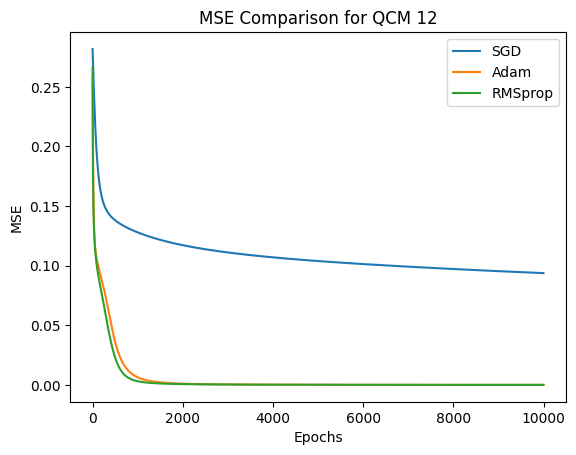

NameError: ignored

In [13]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_sgd6.history['loss'])
plt.plot(history_adam6.history['loss'])
plt.plot(history_rms6.history['loss'])
plt.title('MSE Comparison for QCM 12')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history_adam6.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history1.history['val_loss'])
plt.plot(history_sgd2.history['val_loss'])
plt.plot(history_sgd3.history['val_loss'])
plt.plot(history_sgd4.history['val_loss'])
plt.plot(history_sgd5.history['val_loss'])
plt.plot(history_sgd6.history['val_loss'])
plt.title('Validation Loss Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history_sgd2.history['val_accuracy'])
plt.plot(history_sgd3.history['val_accuracy'])
plt.plot(history_sgd4.history['val_accuracy'])
plt.plot(history_sgd5.history['val_accuracy'])
plt.plot(history_sgd6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_adam1.history['val_loss'])
plt.plot(history_adam2.history['val_loss'])
plt.plot(history_adam3.history['val_loss'])
plt.plot(history_adam4.history['val_loss'])
plt.plot(history_adam5.history['val_loss'])
plt.plot(history_adam6.history['val_loss'])
plt.title('Validation Loss Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_adam1.history['val_accuracy'])
plt.plot(history_adam2.history['val_accuracy'])
plt.plot(history_adam3.history['val_accuracy'])
plt.plot(history_adam4.history['val_accuracy'])
plt.plot(history_adam5.history['val_accuracy'])
plt.plot(history_adam6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_rms1.history['val_loss'])
plt.plot(history_rms2.history['val_loss'])
plt.plot(history_rms3.history['val_loss'])
plt.plot(history_rms4.history['val_loss'])
plt.plot(history_rms5.history['val_loss'])
plt.plot(history_rms6.history['val_loss'])
plt.title('Validation Loss Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_rms1.history['val_accuracy'])
plt.plot(history_rms2.history['val_accuracy'])
plt.plot(history_rms3.history['val_accuracy'])
plt.plot(history_rms4.history['val_accuracy'])
plt.plot(history_rms5.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()
